In [5]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist #this library contains a lot of ML datasets including the MNIST one
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D, BatchNormalization
import pickle #pickle is a library that helps us save a lot of different types of data - anything ranging from Pandas dataframes to TensorFlow models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


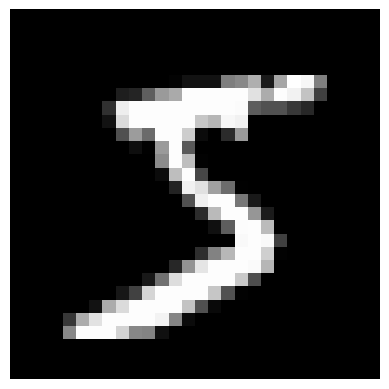

Valor mínimo: 0
Valor máximo: 255


In [6]:
#importar os dados
input_shape = (28, 28, 1)
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
#inpeccionar os dados de treino
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
plt.imshow(train_data[0], cmap='gray')
plt.axis('off')  # Desabilitar os eixos
plt.show()
train_labels[0]

#preparação dos dados para a CNN
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)
min_value = np.min(train_data[0])
max_value = np.max(train_data[0])
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
#normalizar os dados
train_data /= 255
test_data /= 255

In [7]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5,5), input_shape = input_shape))# Input layer
model.add(AveragePooling2D(pool_size=(2, 2)))# downsizing images
model.add(Conv2D(16, kernel_size=(5,5), input_shape = input_shape))# Input layer
model.add(AveragePooling2D(pool_size=(2, 2)))# downsizing images
model.add(Flatten()) #transformar a matriz de 16 camadas em um vector unidimensional
model.add(Dense(120, activation=tf.nn.relu, use_bias=True)) # Adicionar 120 neuroneos com função de activação relu
model.add(Dropout(0.5)) #Implementing dropout regularization with p = 0.5
model.add(Flatten()) #transformar a matriz de 16 camadas em um vector unidimensional
model.add(Dense(84, activation=tf.nn.relu, use_bias=True)) # Adicionar 84 neuroneos com função de activação relu
model.add(Dropout(0.5)) #Implementing dropout regularization with p = 0.5
model.add(Dense(10,activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_labels, epochs=12,batch_size=32)

Epoch 1/12
60000/60000 [==============================] - 11s 190us/sample - loss: 0.5616 - acc: 0.8288
Epoch 2/12
60000/60000 [==============================] - 12s 207us/sample - loss: 0.3373 - acc: 0.9037
Epoch 3/12
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2947 - acc: 0.9168
Epoch 4/12
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2623 - acc: 0.9255
Epoch 5/12
60000/60000 [==============================] - 12s 197us/sample - loss: 0.2481 - acc: 0.9290
Epoch 6/12
60000/60000 [==============================] - 12s 196us/sample - loss: 0.2353 - acc: 0.9335
Epoch 7/12
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2260 - acc: 0.9353
Epoch 8/12
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2162 - acc: 0.9372
Epoch 9/12
60000/60000 [==============================] - 12s 199us/sample - loss: 0.2176 - acc: 0.9382
Epoch 10/12
60000/60000 [==============================] - 12s 1

In [13]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.0996 - acc: 0.9712

Test accuracy: 0.9712


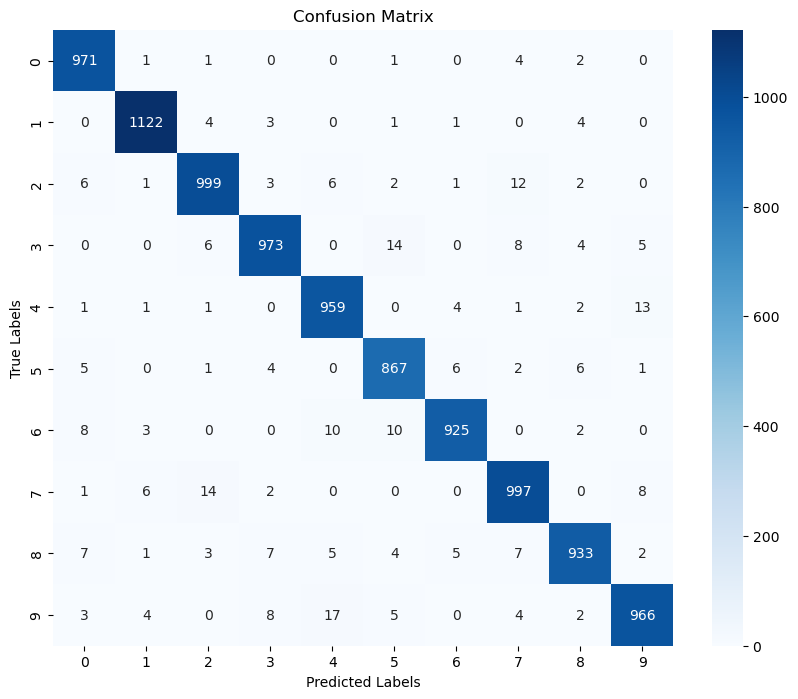

In [14]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5,5),activation='relu',input_shape = input_shape))# Input layer
model.add(MaxPooling2D(pool_size=(2, 2)))# downsizing images
model.add(Conv2D(16, kernel_size=(5,5),activation='relu',input_shape = input_shape))# Input layer
model.add(MaxPooling2D(pool_size=(2, 2)))# downsizing images
model.add(Flatten()) #transformar a matriz de 16 camadas em um vector unidimensional
model.add(Dense(256, activation=tf.nn.relu, use_bias=True)) # Adicionar 120 neuroneos com função de activação relu
model.add(Flatten()) #transformar a matriz de 16 camadas em um vector unidimensional
model.add(Dense(10,activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_labels, epochs=20,batch_size=80)

Epoch 1/15
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.2545 - acc: 0.9236
Epoch 2/15
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1209 - acc: 0.9638
Epoch 3/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0943 - acc: 0.9710
Epoch 4/15
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0810 - acc: 0.9747
Epoch 5/15
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0690 - acc: 0.9782
Epoch 6/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0653 - acc: 0.9789
Epoch 7/15
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0587 - acc: 0.9811
Epoch 8/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0540 - acc: 0.9832
Epoch 9/15
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0533 - acc: 0.9826
Epoch 10/15
60000/60000 [==============================] - 64s 1ms/sample - loss: 

In [70]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 7s 719us/sample - loss: 0.0778 - acc: 0.9847

Test accuracy: 0.9847


In [ ]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

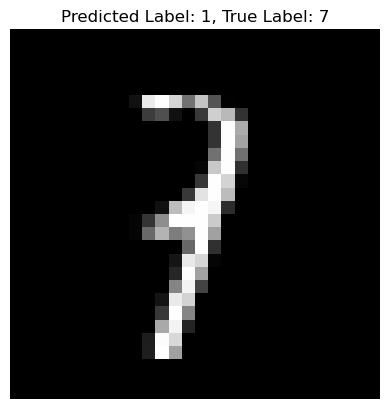

In [71]:
# Encontrar índices das amostras classificadas incorretamente
incorrect_indices = np.where(test_labels != predicted_labels)[0]

# Escolher um índice aleatório dos exemplos classificados incorretamente
random_index = np.random.choice(incorrect_indices)

# Obter a imagem e o rótulo correspondentes ao índice escolhido
incorrect_image = test_data[random_index]
incorrect_label = test_labels[random_index]

# Mostrar a imagem e o rótulo correspondentes
plt.imshow(incorrect_image, cmap='gray')
plt.title(f'Predicted Label: {predicted_labels[random_index]}, True Label: {incorrect_label}')
plt.axis('off')
plt.show()